### Import Libraries..

In [1]:
################################### Basic Import #############################################
import pandas as pd
import datetime
import numpy as np
import os, zipfile 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import matplotlib.cm as cm
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('max_colwidth',999)
pd.set_option('display.max_columns', 999)
pd.set_option("display.max_rows",999)
###################################### Custom Imports ###########################################
import statistics as stat


### Unziping Files..

### Loading Data..

In [3]:
train = pd.read_csv('C:/Users/sutiwari/Desktop/Kaggle/kaggle_home_credit_risk/application_train.csv')
#test = pd.read_csv('C:/Users/sutiwari/Downloads/kaggle_home_credit_risk/application_test.csv')
#bureau = pd.read_csv('C:/Users/sutiwari/Desktop/Kaggle/kaggle_home_credit_risk/bureau.csv')
#bureau_bal = pd.read_csv('C:/Users/sutiwari/Downloads/kaggle_home_credit_risk/bureau_balance.csv')
#credit_card_balance = pd.read_csv('C:/Users/sutiwari/Downloads/kaggle_home_credit_risk/credit_card_balance.csv')
#installments_payments = pd.read_csv('C:/Users/sutiwari/Downloads/kaggle_home_credit_risk/installments_payments.csv')
#POS_CASH_balance = pd.read_csv('C:/Users/sutiwari/Downloads/kaggle_home_credit_risk/POS_CASH_balance.csv')
#previous_application = pd.read_csv('C:/Users/sutiwari/Downloads/kaggle_home_credit_risk/previous_application.csv')

In [4]:
print("application ==>" ,train.shape)
print("application Test ==>",test.shape)
#print("bureau ==>",bureau.shape)
#print("bureau_bal ==>",bureau_bal.shape)
#print("credit_card_balance ==>",credit_card_balance.shape)
#print("installments_payments ==>",installments_payments.shape)
#print("POS_CASH_balance ==>",POS_CASH_balance.shape)
#print("previous_application ==>",previous_application.shape)


application ==> (307511, 122)
application Test ==> (48744, 121)


In [5]:
#### merging the train and test for EDA ####
trainLen = len(train)
application = pd.concat(objs=[train,test],axis=0).reset_index(drop=True)

In [7]:
application.shape

(356255, 122)

In [6]:
application.TARGET.loc[:trainLen-1].tail()

307506    0.0
307507    0.0
307508    0.0
307509    1.0
307510    0.0
Name: TARGET, dtype: float64

### Exploratory Data Analysis ###

##### OutLier Detector #####

In [7]:
from collections import Counter
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   


In [8]:
# detect outliers from Age, SibSp , Parch and Fare
#Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])

##### Lift Calculation for catagorical variables ###

In [9]:
sumed = pd.crosstab(index=application.WEEKDAY_APPR_PROCESS_START,columns=application.TARGET,margins=True)
s = sumed/sumed.ix["All","All"] # each value divide by total
s = sumed/sumed.ix["All"] # each value divide by column total
s = sumed.div(sumed["All"],axis=0) # each value divide by row total
del s

In [35]:
CalculateLiftDiscrete([train.FLAG_OWN_CAR],train.TARGET,['OWNaCAR?'])

,variableName,categoryName,totalTrx,totalTrxPer,totalFraud,totalClean,marginFraudRatio,detectionRate,lift
0,OWNaCAR?,N,202924,0.659892,17249,185675,0.0850,0.6948,1.06
1,OWNaCAR?,Y,104587,0.340108,7576,97011,0.0724,0.3052,0.89


Function for calculating range in decimal

In [25]:
import decimal

def drange(x, y, jump):
    while x < y:
        yield float(x)
        x += decimal.Decimal(jump)
    
list(drange(0,1,1/10))

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9]

##### Lift Calculation for Continous Variables ###

In [139]:
CalculateLiftContinous(train[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']],
                       train.TARGET,['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'],10)

,variableName,categoryName,minValue,maxValue,totalTrx,totalTrxPer,totalFraud,totalClean,marginFraudRatio,detectionRate,lift
0,AMT_INCOME_TOTAL,"(25649.999, 58728.15]",25650.000,5.872500e+04,8512,0.027680,635,7877,0.0746,0.0256,0.92
1,AMT_INCOME_TOTAL,"(58728.15, 81295.2]",58729.500,8.124300e+04,24882,0.080914,2101,22781,0.0844,0.0846,1.05
2,AMT_INCOME_TOTAL,"(81295.2, 102234.15]",81373.500,1.022220e+05,30474,0.099099,2504,27970,0.0822,0.1009,1.02
3,AMT_INCOME_TOTAL,"(102234.15, 121477.5]",102343.500,1.213875e+05,39513,0.128493,3450,36063,0.0873,0.1390,1.09
4,AMT_INCOME_TOTAL,"(121477.5, 143457.75]",121500.000,1.434510e+05,47116,0.153217,3993,43123,0.0847,0.1608,1.05
5,AMT_INCOME_TOTAL,"(143457.75, 171694.8]",143464.500,1.716435e+05,39329,0.127895,3404,35925,0.0866,0.1371,1.08
6,AMT_INCOME_TOTAL,"(171694.8, 208324.8]",171900.000,2.080980e+05,46873,0.152427,3849,43024,0.0821,0.1550,1.02
7,AMT_INCOME_TOTAL,"(208324.8, 263682.0]",208350.000,2.636550e+05,32648,0.106169,2464,30184,0.0755,0.0993,0.93
8,AMT_INCOME_TOTAL,"(263682.0, 389925.0]",263700.000,3.892500e+05,29963,0.097437,1950,28013,0.0651,0.0785,0.79
9,AMT_INCOME_TOTAL,"(389925.0, 117000000.0]",391500.000,1.170000e+08,8201,0.026669,475,7726,0.0579,0.0191,0.70


In [136]:
train[train.columns[~train.columns.isin(['TARGET'])]].select_dtypes(exclude=['object']).head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

#### Application Data Set Analysis ##

##### Remove null variance ### 

In [13]:
def removeNullVariance(dataframe):
    null = []
    for c in dataframe.columns:
        if len(application[c].unique()) < 2:
            null.append(c)
    return null
        

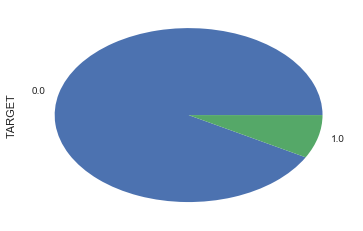

In [14]:
application.TARGET.value_counts().plot.pie()

In [15]:
application.TARGET.value_counts(normalize=True).map(lambda x: x*100)

0.0    91.927118
1.0     8.072882
Name: TARGET, dtype: float64

Highly im-balanced DataSet, with a random guess 91.9% chance it will be legit case.

##### Exploring individual variables ####

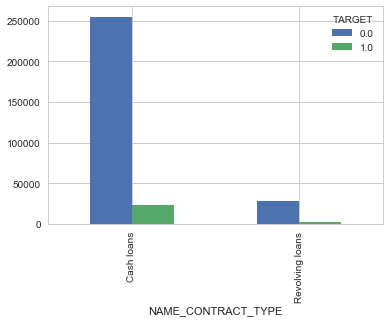

In [16]:
pd.crosstab(application.NAME_CONTRACT_TYPE,application.TARGET).plot.bar()

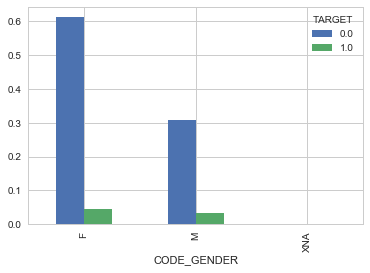

In [17]:
pd.crosstab(application.CODE_GENDER,application.TARGET,normalize=True).plot.bar()

In [18]:
CalculateLiftDiscrete([application.NAME_CONTRACT_TYPE,application.CODE_GENDER,application.FLAG_OWN_CAR],application.TARGET,['Contract_Type','Gender','Car_NoCar'])

,categoryName,detectionRate,lift,marginFraudRatio,totalClean,totalFraud,totalTrx,totalTrxPer,variableName
0,Cash loans,0.9354,1.04,0.0711,255011,23221,326537,0.916582,Contract_Type
1,Revolving loans,0.0646,0.66,0.0540,27675,1604,29718,0.083418,Contract_Type
2,F,0.5708,0.86,0.0603,188278,14170,235126,0.659994,Gender
3,M,0.4292,1.29,0.0880,94404,10655,121125,0.339995,Gender
4,XNA,0.0000,0.00,0.0000,4,0,4,0.000011,Gender
5,N,0.6948,1.06,0.0733,185675,17249,235235,0.660300,Car_NoCar
6,Y,0.3052,0.89,0.0626,97011,7576,121020,0.339700,Car_NoCar


Since, the "XNA" are not adding any lift or meaning. Replacing it with the Gender Mode

In [19]:
application.CODE_GENDER = application.CODE_GENDER.map({'M':'M','F':'F','XNA':stat.mode(application.loc[:trainLen-1].CODE_GENDER)})

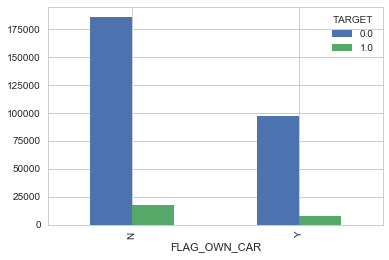

In [20]:
pd.crosstab(application.FLAG_OWN_CAR,application.TARGET).plot.bar()

Trying to look into combined effect of the luxaries items like house + mobil + car + phone

In [21]:
CalculateLiftDiscrete([application.FLAG_EMAIL,application.FLAG_PHONE,application.FLAG_MOBIL,application.FLAG_EMP_PHONE
,application.FLAG_WORK_PHONE,application.FLAG_OWN_CAR,application.FLAG_OWN_REALTY],application.TARGET,['EMAIL','PHONE',
                                                                                                      'MOBILE','OFFICE_PHONE',
                                                                                                      'HOME_PHONE','CAR','HOME'])

,categoryName,detectionRate,lift,marginFraudRatio,totalClean,totalFraud,totalTrx,totalTrxPer,variableName
0,0,0.9447,1.00,0.0709,266618,23451,330885,0.928787,EMAIL
1,1,0.0553,0.97,0.0542,16068,1374,25370,0.071213,EMAIL
2,0,0.7550,1.05,0.0729,202336,18744,256998,0.721388,PHONE
3,1,0.2450,0.86,0.0613,80350,6081,99257,0.278612,PHONE
4,0,0.0000,0.00,0.0000,1,0,2,0.000006,MOBILE
5,1,1.0000,1.00,0.0697,282685,24825,356253,0.999994,MOBILE
6,0,0.1205,0.65,0.0463,52395,2991,64661,0.181502,OFFICE_PHONE
7,1,0.8795,1.08,0.0749,230291,21834,291594,0.818498,OFFICE_PHONE
8,0,0.7622,0.95,0.0664,227282,18921,284969,0.799902,HOME_PHONE
9,1,0.2378,1.21,0.0828,55404,5904,71286,0.200098,HOME_PHONE


In [22]:
### Null count check ###
application[['FLAG_EMAIL','FLAG_PHONE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_OWN_CAR','FLAG_OWN_REALTY']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Data columns (total 7 columns):
FLAG_EMAIL         356255 non-null int64
FLAG_PHONE         356255 non-null int64
FLAG_MOBIL         356255 non-null int64
FLAG_EMP_PHONE     356255 non-null int64
FLAG_WORK_PHONE    356255 non-null int64
FLAG_OWN_CAR       356255 non-null object
FLAG_OWN_REALTY    356255 non-null object
dtypes: int64(5), object(2)
memory usage: 19.0+ MB


In [23]:
### FLAG_OWN_CAR and FLAG_OWN_REALTY needs to be converted to 1's and 0's ###
application.FLAG_OWN_CAR = application.FLAG_OWN_CAR.map({'N':0,'Y':1})
application.FLAG_OWN_REALTY = application.FLAG_OWN_REALTY.map({'N':0,'Y':1})

In [24]:
application['FLAG_LUXURY'] = application.FLAG_CONT_MOBILE+application.FLAG_EMAIL+application.FLAG_PHONE+application.FLAG_MOBIL+application.FLAG_EMP_PHONE+application.FLAG_WORK_PHONE+application.FLAG_OWN_CAR+application.FLAG_OWN_REALTY

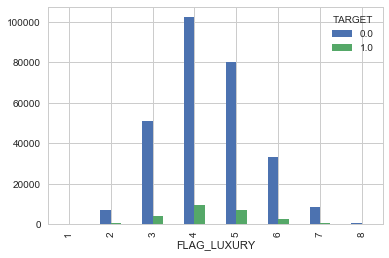

In [25]:
pd.crosstab(application.FLAG_LUXURY,application.TARGET).plot.bar()

In [26]:
CalculateLiftDiscrete([application.FLAG_LUXURY],application.TARGET,['LUXURY'])

,categoryName,detectionRate,lift,marginFraudRatio,totalClean,totalFraud,totalTrx,totalTrxPer,variableName
0,1,0.0000,0.00,0.0000,3,0,4,0.000011,LUXURY
1,2,0.0181,0.75,0.0533,6874,450,8448,0.023713,LUXURY
2,3,0.1614,0.90,0.0638,50836,4006,62835,0.176376,LUXURY
3,4,0.3917,1.08,0.0755,102448,9724,128797,0.361530,LUXURY
4,5,0.2862,1.01,0.0695,80366,7105,102185,0.286831,LUXURY
5,6,0.1130,0.96,0.0657,33179,2804,42669,0.119771,LUXURY
6,7,0.0280,0.93,0.0648,8500,694,10715,0.030077,LUXURY
7,8,0.0017,1.00,0.0698,480,42,602,0.001690,LUXURY


Now as we can see the Feature has lift for all the bins above 50% thus we can consider it and feed it to the XGBoost

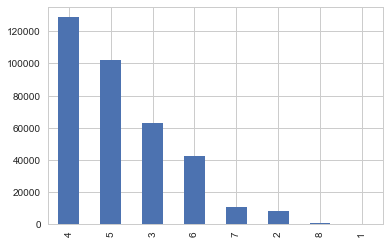

In [27]:
application.FLAG_LUXURY.value_counts().plot.bar()

Trying to look into the effect of Document Flags 

In [28]:
application[['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Data columns (total 20 columns):
FLAG_DOCUMENT_2     356255 non-null int64
FLAG_DOCUMENT_3     356255 non-null int64
FLAG_DOCUMENT_4     356255 non-null int64
FLAG_DOCUMENT_5     356255 non-null int64
FLAG_DOCUMENT_6     356255 non-null int64
FLAG_DOCUMENT_7     356255 non-null int64
FLAG_DOCUMENT_8     356255 non-null int64
FLAG_DOCUMENT_9     356255 non-null int64
FLAG_DOCUMENT_10    356255 non-null int64
FLAG_DOCUMENT_11    356255 non-null int64
FLAG_DOCUMENT_12    356255 non-null int64
FLAG_DOCUMENT_13    356255 non-null int64
FLAG_DOCUMENT_14    356255 non-null int64
FLAG_DOCUMENT_15    356255 non-null int64
FLAG_DOCUMENT_16    356255 non-null int64
FLAG_DOCUMENT_17    356255 non-null int64
FLAG_DOCUMENT_18    356255 non-null int64
FLAG_DOCUMENT_19    356255 non-null int64
FLAG_DOCUMENT_20    356255 non-null int64
FLAG_DOCUMENT_21    356255 non-null int64
dtypes: int64(20)
memory usage: 54.4 MB


In [29]:
application['FLAG_DOCUMENTS'] = application['FLAG_DOCUMENT_2']+application['FLAG_DOCUMENT_3']+application['FLAG_DOCUMENT_4']+application['FLAG_DOCUMENT_5']+application['FLAG_DOCUMENT_6']+application['FLAG_DOCUMENT_7']+application['FLAG_DOCUMENT_8']+application['FLAG_DOCUMENT_9']+application['FLAG_DOCUMENT_10']+application['FLAG_DOCUMENT_11']+application['FLAG_DOCUMENT_12']+application['FLAG_DOCUMENT_13']+application['FLAG_DOCUMENT_14']+application['FLAG_DOCUMENT_15']+application['FLAG_DOCUMENT_16']+application['FLAG_DOCUMENT_17']+application['FLAG_DOCUMENT_18']+application['FLAG_DOCUMENT_19']+application['FLAG_DOCUMENT_20']+application['FLAG_DOCUMENT_21']

In [30]:
CalculateLiftDiscrete([application.FLAG_DOCUMENTS],application.TARGET,['Document'])

,categoryName,detectionRate,lift,marginFraudRatio,totalClean,totalFraud,totalTrx,totalTrxPer,variableName
0,0,0.0657,0.670000,0.0539,27917,1632,30296,0.085040,Document
1,1,0.9191,1.050000,0.0717,247239,22817,318053,0.892768,Document
2,2,0.0145,0.550000,0.0464,7383,359,7742,0.021732,Document
3,3,0.0006,1.240000,0.0982,147,16,163,0.000458,Document
4,4,0.0000,inf,1.0000,0,1,1,0.000003,Document


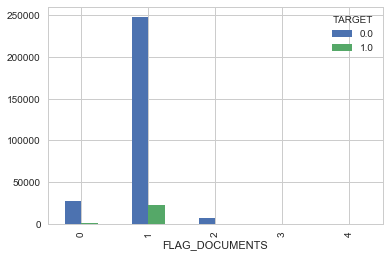

In [31]:
pd.crosstab(application.FLAG_DOCUMENTS,application.TARGET).plot.bar()

Trying on the linear combination of the Region and Address related Flags

In [32]:
application[['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']].head()

,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,1,1


In [33]:
CalculateLiftDiscrete([application['REG_REGION_NOT_LIVE_REGION'],application['REG_REGION_NOT_WORK_REGION'],application['LIVE_REGION_NOT_WORK_REGION'],application['REG_CITY_NOT_LIVE_CITY'],application['REG_CITY_NOT_WORK_CITY'],application['LIVE_CITY_NOT_WORK_CITY']],
                      application.TARGET,['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY'])

,categoryName,detectionRate,lift,marginFraudRatio,totalClean,totalFraud,totalTrx,totalTrxPer,variableName
0,0,0.9826,1.00,0.0696,278462,24392,350680,0.984351,REG_REGION_NOT_LIVE_REGION
1,1,0.0174,1.17,0.0777,4224,433,5575,0.015649,REG_REGION_NOT_LIVE_REGION
2,0,0.9441,0.99,0.0693,268462,23437,337954,0.948629,REG_REGION_NOT_WORK_REGION
3,1,0.0559,1.11,0.0758,14224,1388,18301,0.051371,REG_REGION_NOT_WORK_REGION
4,0,0.9575,1.00,0.0696,271239,23769,341703,0.959153,LIVE_REGION_NOT_WORK_REGION
5,1,0.0425,1.05,0.0726,11447,1056,14552,0.040847,LIVE_REGION_NOT_WORK_REGION
6,0,0.8816,0.95,0.0666,261586,21886,328440,0.921924,REG_CITY_NOT_LIVE_CITY
7,1,0.1184,1.59,0.1057,21100,2939,27815,0.078076,REG_CITY_NOT_LIVE_CITY
8,0,0.6971,0.90,0.0631,219339,17305,274437,0.770339,REG_CITY_NOT_WORK_CITY
9,1,0.3029,1.35,0.0919,63347,7520,81818,0.229661,REG_CITY_NOT_WORK_CITY


In [34]:
application['FLAG_ADDRESS'] = application['REG_REGION_NOT_LIVE_REGION']+application['REG_REGION_NOT_WORK_REGION']+application['LIVE_REGION_NOT_WORK_REGION']+application['REG_CITY_NOT_LIVE_CITY']+application['REG_CITY_NOT_WORK_CITY']+application['LIVE_CITY_NOT_WORK_CITY']

In [35]:
CalculateLiftDiscrete([application['FLAG_ADDRESS']],application.TARGET,['Address'])

,categoryName,detectionRate,lift,marginFraudRatio,totalClean,totalFraud,totalTrx,totalTrxPer,variableName
0,0,0.6718,0.90,0.0630,211676,16678,264834,0.743383,Address
1,1,0.0048,1.08,0.0751,1265,120,1598,0.004486,Address
2,2,0.2656,1.31,0.0894,57484,6593,73771,0.207074,Address
3,3,0.0147,1.60,0.1066,2589,364,3414,0.009583,Address
4,4,0.0379,1.25,0.0839,8603,941,11211,0.031469,Address
5,5,0.0039,1.43,0.0951,772,97,1020,0.002863,Address
6,6,0.0013,1.23,0.0786,297,32,407,0.001142,Address


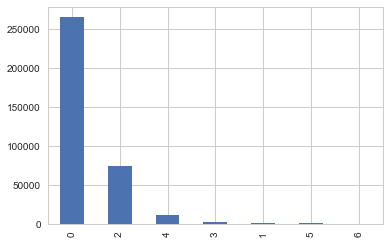

In [36]:
application.FLAG_ADDRESS.value_counts().plot.bar()

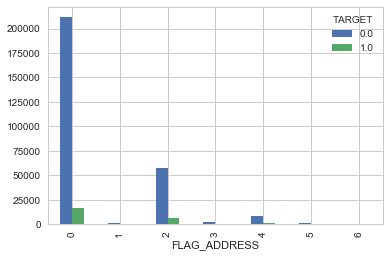

In [37]:
pd.crosstab(application.FLAG_ADDRESS,application.TARGET).plot.bar()

Working on the House mean median mode relationship

In [38]:
application.CNT_CHILDREN.value_counts()

0     250056
1      70623
2      30698
3       4252
4        478
5         96
6         24
7          8
8          5
14         3
11         3
19         2
12         2
10         2
9          2
20         1
Name: CNT_CHILDREN, dtype: int64

In [39]:
application['ChildCount'] = application.CNT_CHILDREN.map({0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:7,9:7,10:7
                                                         ,11:7,12:7,14:7,19:7,20:7})

In [40]:
#application.ChildCount = application['ChildCount'].apply(pd.to_numeric)

In [41]:
CalculateLiftDiscrete([application.NAME_CONTRACT_TYPE,application.NAME_TYPE_SUITE,
                      application.NAME_INCOME_TYPE,application.NAME_EDUCATION_TYPE
                      ,application.NAME_FAMILY_STATUS,application.NAME_HOUSING_TYPE,
                      application.OCCUPATION_TYPE,application.ChildCount],application.TARGET,['Contract','AcompaniedApplicant',
                                                                      'IncomeType','EducationType','FamilyStatus','HousingType',
                                                                      'OccupationType','childCount'])

,categoryName,detectionRate,lift,marginFraudRatio,totalClean,totalFraud,totalTrx,totalTrxPer,variableName
0,Cash loans,0.9354,1.04,0.0711,255011,23221,326537,0.916582,Contract
1,Revolving loans,0.0646,0.66,0.0540,27675,1604,29718,0.083418,Contract
2,-999999,0.0028,0.65,0.0318,1222,70,2203,0.006184,AcompaniedApplicant
3,Children,0.0097,0.91,0.0656,3026,241,3675,0.010316,AcompaniedApplicant
4,Family,0.1212,0.92,0.0654,37140,3009,46030,0.129205,AcompaniedApplicant
5,Group of people,0.0009,1.06,0.0719,248,23,320,0.000898,AcompaniedApplicant
6,Other_A,0.0031,1.10,0.0779,790,76,975,0.002737,AcompaniedApplicant
7,Other_B,0.0070,1.24,0.0878,1596,174,1981,0.005561,AcompaniedApplicant
8,"Spouse, partner",0.0361,0.97,0.0698,10475,895,12818,0.035980,AcompaniedApplicant
9,Unaccompanied,0.8192,1.01,0.0706,228189,20337,288253,0.809120,AcompaniedApplicant


XGBoost is picking up the significance of the above Catagorical variable so as of now I will pass it as is.

###### Exploring the numerical Variables

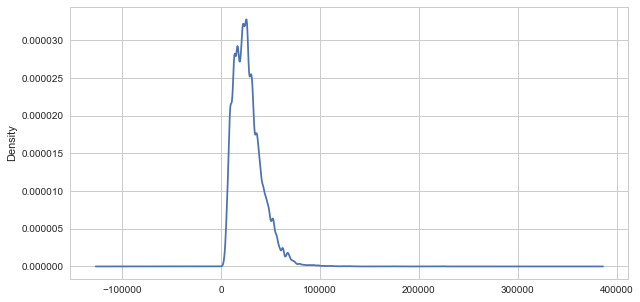

In [42]:
application.AMT_ANNUITY.plot(kind='density',figsize=(10,5))

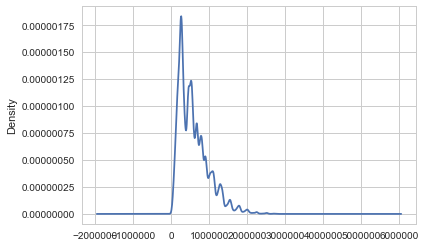

In [43]:
application.AMT_CREDIT.plot.kde()

Since these Amount Annuity and Amount Credit are picked as high important features by XGBoost looking into the interaction between them

In [64]:
application['ANNUITY/CREDIT'] = application.AMT_ANNUITY/application.AMT_CREDIT

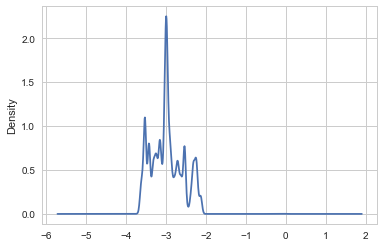

In [45]:
application['ANNUITY/CREDIT'].map(lambda i: np.log(i) if i > 0 else 0).plot.kde() 

In [46]:
application['ANNUITY/CREDIT'] = application['ANNUITY/CREDIT'].map(lambda i: np.log(i) if i > 0 else 0)

In [47]:
application['EX_SC'] = application.EXT_SOURCE_1**2+application.EXT_SOURCE_2**2+application.EXT_SOURCE_3**2

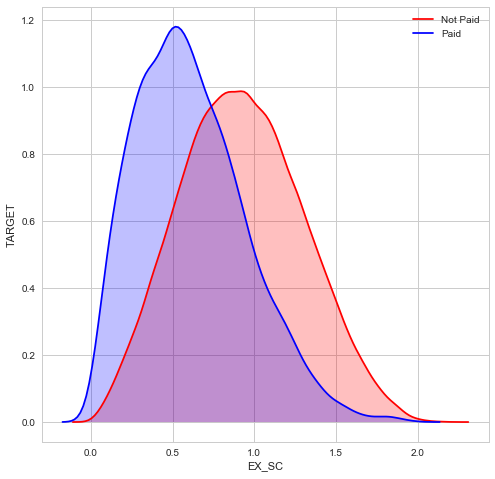

In [48]:
# Explore External Source 1 distibution 
plt.figure(figsize = (8, 8))
g = sns.kdeplot(application["EX_SC"][(application["TARGET"] == 0) & (application["EX_SC"].notnull())], color="Red", shade = True)
g = sns.kdeplot(application["EX_SC"][(application["TARGET"] == 1) & (application["EX_SC"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("EX_SC")
g.set_ylabel("TARGET")
g = g.legend(["Not Paid","Paid"])

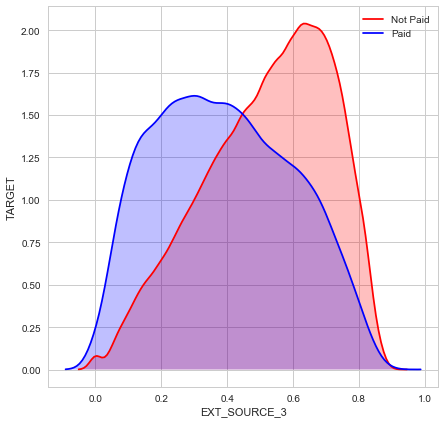

In [49]:
# Explore External Source 1 distibution 
plt.figure(figsize = (7, 7))
g = sns.kdeplot(application["EXT_SOURCE_3"][(application["TARGET"] == 0) & (application["EXT_SOURCE_3"].notnull())], color="Red", shade = True)
g = sns.kdeplot(application["EXT_SOURCE_3"][(application["TARGET"] == 1) & (application["EXT_SOURCE_3"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("EXT_SOURCE_3")
g.set_ylabel("TARGET")
g = g.legend(["Not Paid","Paid"])

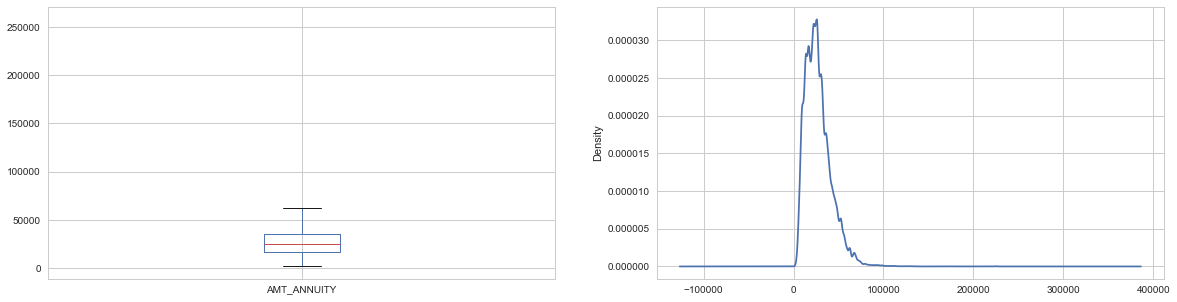

In [50]:
fig, axarr = plt.subplots(1, 2)

application["AMT_ANNUITY"][application.AMT_ANNUITY <= 300000].plot(kind="box",ax=axarr[0],figsize=(10,5))

application["AMT_ANNUITY"][application.AMT_ANNUITY <= 300000].plot(kind="kde",ax=axarr[1],figsize=(20,5))

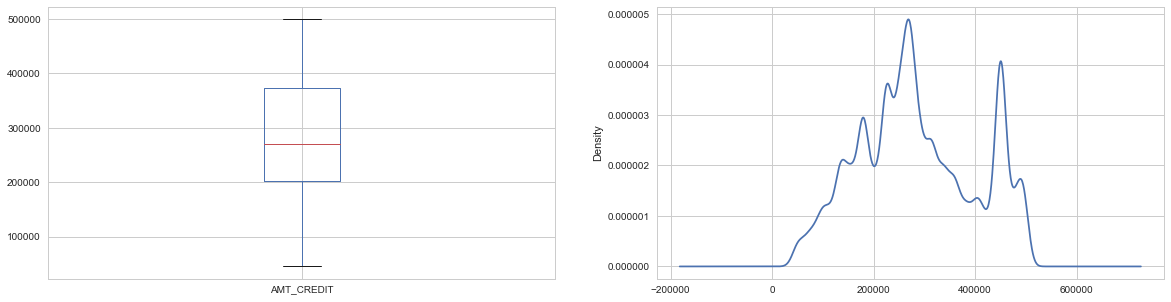

In [51]:
fig, axarr = plt.subplots(1, 2)

application["AMT_CREDIT"][application.AMT_CREDIT <= 500000].plot(kind="box",ax=axarr[0],figsize=(10,5))

application["AMT_CREDIT"][application.AMT_CREDIT <= 500000].plot(kind="kde",ax=axarr[1],figsize=(20,5))

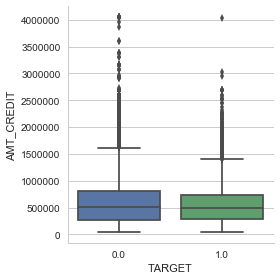

In [52]:
g = sns.factorplot(y='AMT_CREDIT',x='TARGET',data=application,kind="box",size=4)

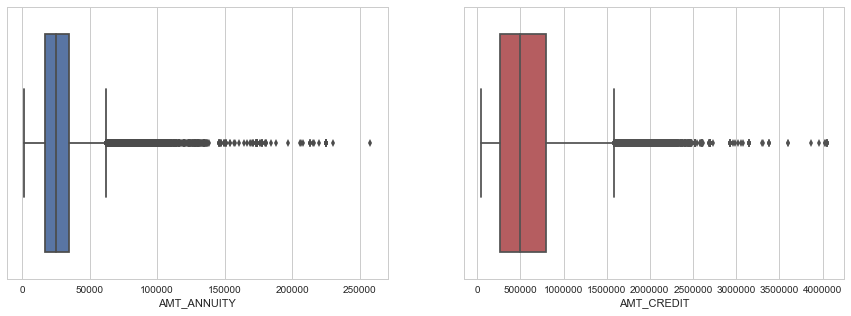

In [60]:
fig, axx = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(application.AMT_ANNUITY,ax=axx[0])
sns.boxplot(application.AMT_CREDIT,color='r',ax=axx[1])


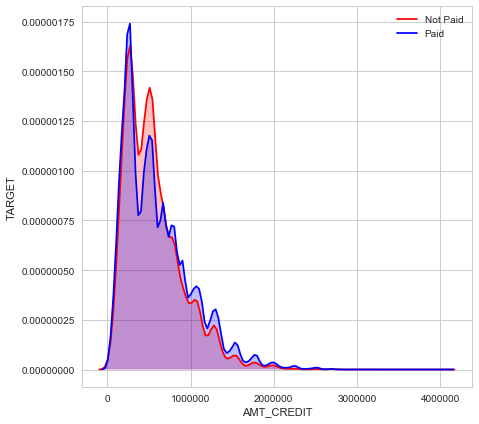

In [66]:
# Explore External Source 1 distibution 
plt.figure(figsize = (7, 7))
g = sns.kdeplot(application["AMT_CREDIT"][(application["TARGET"] == 1) & (application["AMT_CREDIT"].notnull())], color="Red", shade = True)
g = sns.kdeplot(application["AMT_CREDIT"][(application["TARGET"] == 0) & (application["AMT_CREDIT"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("AMT_CREDIT")
g.set_ylabel("TARGET")
g = g.legend(["Not Paid","Paid"])

 As we can see above if the annuity amount is more than ~152000 the person is more likely to pay his loan back

In [61]:
CalculateLiftContinous([application.AMT_ANNUITY],application.TARGET,["ANNUITY"],10)

,categoryName,detectionRate,lift,marginFraudRatio,maxValue,minValue,totalClean,totalFraud,totalTrx,totalTrxPer,variableName
0,"[1615.5, 10086.75]",0.0680,0.87,0.0632,10084.5,1615.5,22126,1688,26711,0.074985,ANNUITY
1,"(10086.75, 16551]",0.1513,0.86,0.0622,16551.0,10089.0,49504,3755,60381,0.169505,ANNUITY
2,"(16551, 22943.25]",0.2108,1.13,0.0783,22941.0,16555.5,52791,5234,66878,0.187744,ANNUITY
3,"(22943.25, 29349]",0.2064,1.09,0.0748,29349.0,22945.5,53533,5124,68530,0.192382,ANNUITY
4,"(29349, 35853.75]",0.1663,1.20,0.0823,35851.5,29353.5,39222,4129,50172,0.140846,ANNUITY
5,"(35853.75, 42498]",0.0956,1.02,0.0721,42498.0,35856.0,26590,2374,32948,0.092494,ANNUITY
6,"(42498, 49452.75]",0.0504,0.80,0.0549,49450.5,42502.5,17930,1252,22801,0.064008,ANNUITY
7,"(49452.75, 57411]",0.0313,0.78,0.0520,57411.0,49455.0,11306,777,14948,0.041963,ANNUITY
8,"(57411, 70274.25]",0.0154,0.64,0.0426,70272.0,57415.5,6770,383,9000,0.025265,ANNUITY
9,"(70274.25, 258025.4999999]",0.0044,0.43,0.0283,230161.5,70276.5,2901,109,3849,0.010805,ANNUITY


In [38]:
print(application.AMT_CREDIT.describe())
print(train.AMT_ANNUITY.describe())

count    3.562550e+05
mean     5.877674e+05
std      3.986237e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.002110e+05
75%      7.975575e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


In [58]:
application.DAYS_BIRTH.describe()

count    356255.000000
mean         43.948627
std          11.941929
min          20.104110
25%          34.041096
50%          43.164384
75%          53.906849
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [57]:
application.DAYS_BIRTH = (-1*application.DAYS_BIRTH)/365
application.DAYS_BIRTH.head()

0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
Name: DAYS_BIRTH, dtype: float64

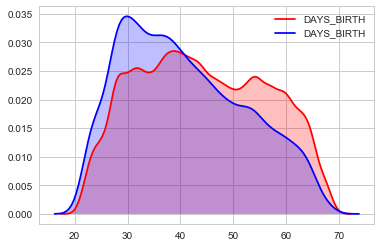

In [73]:
g = sns.kdeplot(application["DAYS_BIRTH"][(application["TARGET"]==0)&(application["DAYS_BIRTH"].notnull())],color="Red",shade=True)
g = sns.kdeplot(application["DAYS_BIRTH"][(application["TARGET"]==1)&(application["DAYS_BIRTH"].notnull())],color="Blue",ax=g,shade=True)

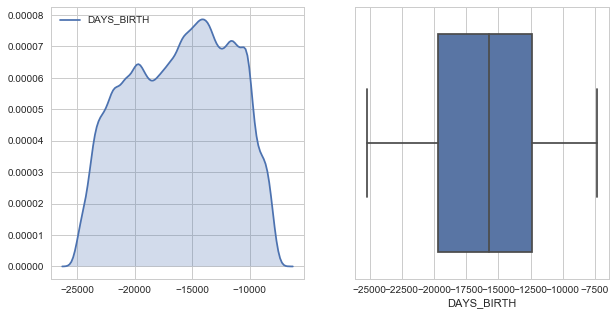

In [68]:
fig, axe = plt.subplots(1,2,figsize=(10,5))
sns.kdeplot(application.DAYS_BIRTH,shade=True,ax=axe[0])
sns.boxplot(application.DAYS_BIRTH,ax=axe[1])

In [132]:
print(train['DAYS_EMPLOYED'].describe().apply(lambda x:format(x,'f')))
print("Above we can see the application(train) describe")
print(test.DAYS_EMPLOYED.describe().apply(lambda x:format(x,'f')))

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: object
Above we can see the application(train) describe
count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: object


In [136]:
application.DAYS_EMPLOYED.describe().apply(lambda x:format(x,'f'))

count    356255.000000
mean          0.000004
std           0.000008
min          -0.000001
25%          -0.000000
50%          -0.000000
75%          -0.000000
max           0.000021
Name: DAYS_EMPLOYED, dtype: object

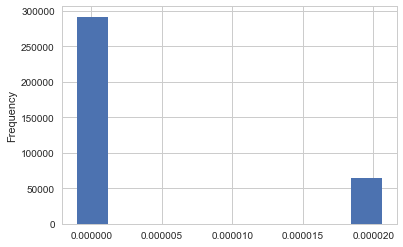

In [140]:
application.DAYS_EMPLOYED.plot(kind='hist')

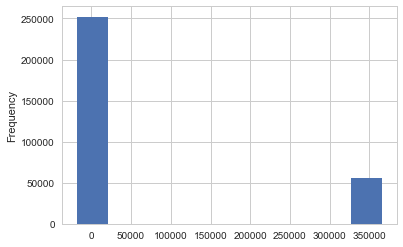

In [141]:
train.DAYS_EMPLOYED.plot(kind='hist')

In [150]:
application.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Data columns (total 128 columns):
AMT_ANNUITY                     356219 non-null float64
AMT_CREDIT                      356255 non-null float64
AMT_GOODS_PRICE                 355977 non-null float64
AMT_INCOME_TOTAL                356255 non-null float64
AMT_REQ_CREDIT_BUREAU_DAY       308687 non-null float64
AMT_REQ_CREDIT_BUREAU_HOUR      308687 non-null float64
AMT_REQ_CREDIT_BUREAU_MON       308687 non-null float64
AMT_REQ_CREDIT_BUREAU_QRT       308687 non-null float64
AMT_REQ_CREDIT_BUREAU_WEEK      308687 non-null float64
AMT_REQ_CREDIT_BUREAU_YEAR      308687 non-null float64
APARTMENTS_AVG                  176307 non-null float64
APARTMENTS_MEDI                 176307 non-null float64
APARTMENTS_MODE                 176307 non-null float64
BASEMENTAREA_AVG                148671 non-null float64
BASEMENTAREA_MEDI               148671 non-null float64
BASEMENTAREA_MODE               148671 non-null 

In [153]:
application.AMT_ANNUITY.describe()

count    356219.000000
mean      27425.560657
std       14732.808190
min        1615.500000
25%       16731.000000
50%       25078.500000
75%       34960.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

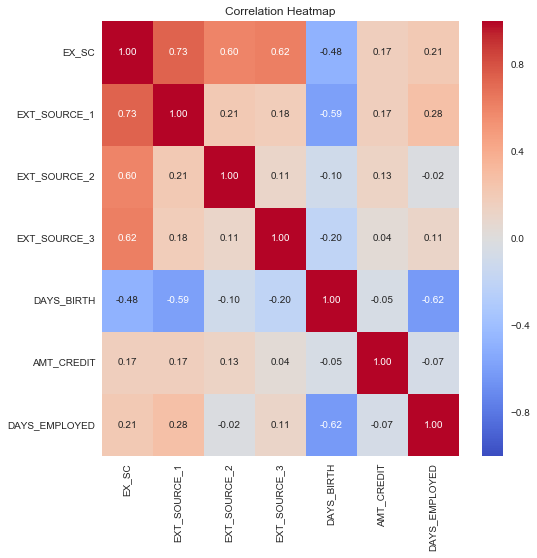

In [50]:
#### Heat Co-relation Plot ####
plt.figure(figsize=(8,8))
sns.heatmap(application[['EX_SC','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','AMT_CREDIT','DAYS_EMPLOYED']].corr(),cmap="coolwarm",annot=True,fmt=".2f")
plt.title('Correlation Heatmap')

##### Create Polynomial Features For Important Feature by XGBoost #####

In [51]:
polyFeatures = application[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH','DAYS_EMPLOYED','OWN_CAR_AGE', 'TARGET']]
polyFeatures.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,TARGET
0,0.083037,0.262949,0.139376,-9461,-637,NaN,1.0
1,0.311267,0.622246,NaN,-16765,-1188,NaN,0.0
2,NaN,0.555912,0.729567,-19046,-225,26.0,0.0
3,NaN,0.650442,NaN,-19005,-3039,NaN,0.0
4,NaN,0.322738,NaN,-19932,-3038,NaN,0.0


In [52]:
## imputer for handling missing values ##
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
polyTarget = polyFeatures.TARGET
polyFeatures = polyFeatures.drop(['TARGET'],axis=1)
polyFeatures = imputer.fit_transform(polyFeatures)
from sklearn.preprocessing import PolynomialFeatures
ployTransformer = PolynomialFeatures(degree=3)
ployTransformer.fit(polyFeatures)
poly_feature = ployTransformer.transform(polyFeatures)
print('polynomial Features shape :',polyFeatures.shape)
l = ployTransformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH','DAYS_EMPLOYED','OWN_CAR_AGE'])


polynomial Features shape : (356255, 6)


In [53]:
poly_feature.shape

(356255, 84)

In [54]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_feature, 
                             columns = l)
                                                                           

##### Using XGBoost Finding the Important Feature to Include ####

xgb = XGBClassifier()
xgb.fit(poly_features,Y)
fig, ax = plt.subplots(figsize=(20, 40))
plot_importance(xgb, ax=ax)

In [55]:
poly_features = poly_features[['EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3','EXT_SOURCE_2 DAYS_EMPLOYED^2','EXT_SOURCE_2 EXT_SOURCE_3^2',
                              'EXT_SOURCE_1^2 DAYS_BIRTH','EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH','DAYS_BIRTH OWN_CAR_AGE^2']]

In [56]:
poly_features.describe()

,EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3,EXT_SOURCE_2 DAYS_EMPLOYED^2,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_1^2 DAYS_BIRTH,EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH,DAYS_BIRTH OWN_CAR_AGE^2
count,3.562550e+05,3.562550e+05,3.562550e+05,356255.000000,356255.000000,3.562550e+05
mean,1.382383e-01,1.230621e+10,1.547004e-01,-4603.416033,-4378.121243,-2.331653e+06
std,8.755604e-02,2.835909e+10,1.113543e-01,3012.993163,2586.892793,6.484120e+06
min,2.651825e-09,0.000000e+00,2.762426e-12,-22317.010736,-19490.674093,-1.340141e+08
25%,6.856145e-02,3.827035e+05,6.416081e-02,-5606.520835,-5968.200588,-1.750896e+06
50%,1.307722e-01,2.399525e+06,1.414617e-01,-4267.657836,-4112.215733,-1.315197e+06
75%,1.935342e-01,1.830851e+07,2.148207e-01,-2790.476909,-2408.957749,-9.099540e+05
max,6.185571e-01,1.140590e+11,6.219768e-01,-1.909499,-0.138642,-0.000000e+00


Since EXT_SOURCE_2 DAYS_EMPLOYED^2 is very high and may cause issues while modeling So normalizing it.

In [57]:
mean = poly_features['EXT_SOURCE_2 DAYS_EMPLOYED^2'].mean()
std = poly_features['EXT_SOURCE_2 DAYS_EMPLOYED^2'].std()
poly_features['NormalizedEXT_SOURCE_2 DAYS_EMPLOYED^2'] = (poly_features['EXT_SOURCE_2 DAYS_EMPLOYED^2'] - mean)/std
poly_features = poly_features.drop(['EXT_SOURCE_2 DAYS_EMPLOYED^2'],axis=1)

For the baseline mode cleaning the Application Data to feed into the XGBoost for feature importance

In [58]:
## Replacing the NAN into numpy NaN ##
application = application.fillna(np.nan)
## Looking for Columns with Object Type ##
object_ = application.loc[:,application.dtypes== np.object]
object_.columns

Index(['CODE_GENDER', 'EMERGENCYSTATE_MODE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE',
       'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
       'WALLSMATERIAL_MODE', 'WEEKDAY_APPR_PROCESS_START'],
      dtype='object')

In [59]:
## Label Encoding for each Columns ##
object_.NAME_CONTRACT_TYPE = object_.NAME_CONTRACT_TYPE.map({'Cash loans':0,'Revolving loans':1})

In [60]:
object_.CODE_GENDER =object_.CODE_GENDER.map({'F':0,'M':1})

In [61]:
#object_.FLAG_OWN_CAR = object_.FLAG_OWN_CAR.map({'N':0,'Y':1})

In [62]:
#object_.FLAG_OWN_REALTY = object_.FLAG_OWN_REALTY.map({'N':0,'Y':1})

In [63]:
object_.NAME_TYPE_SUITE = object_.NAME_TYPE_SUITE.map({'Unaccompanied':0,'Family':1,'Spouse, partner':2,'Children':3,
                                                      'Other_B':4,'Other_A':5,'Group of people':6})


In [64]:
object_.NAME_INCOME_TYPE = object_.NAME_INCOME_TYPE.map({'Working':1,'Commercial associate':2,'Pensioner':3,
                                                        'State servant':4,'Unemployed':0,'Student':5,'Businessman':6,
                                                        'Maternity leave':7})


In [65]:
object_.NAME_EDUCATION_TYPE = object_.NAME_EDUCATION_TYPE.map({'Secondary / secondary special':1,'Higher education':2,
                                                              'Incomplete higher':0,'Lower secondary':3,
                                                              'Academic degree':4})


In [66]:
object_.NAME_FAMILY_STATUS = object_.NAME_FAMILY_STATUS.map({'Married':1,'Single / not married':0,
                                                            'Civil marriage':2,'Separated':3,'Widow':4,'Unknown':5})

In [67]:
object_.NAME_HOUSING_TYPE = object_.NAME_HOUSING_TYPE.map({'House / apartment':1,'With parents':0,
                                                           'Municipal apartment':2,'Rented apartment':3,
                                                          'Office apartment':4,'Co-op apartment':5})

In [68]:
object_.OCCUPATION_TYPE = object_.OCCUPATION_TYPE.map({'Laborers':1,'Low-skill Laborers':0,'Sales staff':2,
                                                       'Core staff':3,'Managers':4,'Drivers':5,'High skill tech staff':6,
                                                      'Accountants':7,'Medicine staff':8,
                                                      'Security staff':9,'Cooking staff':10,
                                                      'Cleaning staff':11,'Private service staff':12,
                                                      'Waiters/barmen staff':13,
                                                      'Secretaries':14,
                                                      'Realty agents':15,
                                                      'HR staff':16,
                                                      'IT staff':17})


In [69]:
object_.WEEKDAY_APPR_PROCESS_START = object_.WEEKDAY_APPR_PROCESS_START.map({'TUESDAY':2,'WEDNESDAY':3,
                                                                            'MONDAY':1,'THURSDAY':4,'FRIDAY':5,
                                                                            'SATURDAY':6,'SUNDAY':0})

In [70]:
from sklearn import preprocessing
d = preprocessing.LabelEncoder()
# Encoding the variable
d.fit(object_['ORGANIZATION_TYPE'])
fit = d.transform(object_['ORGANIZATION_TYPE'])
object_.ORGANIZATION_TYPE = fit
# Inverse the encoded
#fit.apply(lambda x: d[x.name].inverse_transform(x))

In [71]:
object_.FONDKAPREMONT_MODE=object_.FONDKAPREMONT_MODE.map({'reg oper account':0,'reg oper spec account':1,
                                                          'not specified':2,'org spec account':3})


In [72]:
object_.HOUSETYPE_MODE = object_.HOUSETYPE_MODE.map({'block of flats':0,'specific housing':1,'terraced house':2})

In [73]:
object_.WALLSMATERIAL_MODE = object_.WALLSMATERIAL_MODE.map({'Panel':0,'Stone, brick':1,'Block':2,
                                                            'Wooden':3,'Mixed':4,'Monolithic':5,'Others':6})

In [74]:
object_.EMERGENCYSTATE_MODE = object_.EMERGENCYSTATE_MODE.map({'No':0,'Yes':1})

In [75]:
object_.head()

,CODE_GENDER,EMERGENCYSTATE_MODE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,OCCUPATION_TYPE,ORGANIZATION_TYPE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START
0,1,0.0,0.0,0.0,0,1,0,1,1,0.0,1.0,5,1.0,3
1,0,0.0,0.0,0.0,0,2,1,1,4,1.0,3.0,39,2.0,1
2,1,NaN,NaN,NaN,1,1,0,1,1,0.0,1.0,11,NaN,1
3,0,NaN,NaN,NaN,0,1,2,1,1,0.0,1.0,5,NaN,3
4,1,NaN,NaN,NaN,0,1,0,1,1,0.0,3.0,37,NaN,4


### Bureau Data Analysis ##

In [5]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [4]:
bureau.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
SK_ID_CURR                1716428 non-null int64
SK_ID_BUREAU              1716428 non-null int64
CREDIT_ACTIVE             1716428 non-null object
CREDIT_CURRENCY           1716428 non-null object
DAYS_CREDIT               1716428 non-null int64
CREDIT_DAY_OVERDUE        1716428 non-null int64
DAYS_CREDIT_ENDDATE       1610875 non-null float64
DAYS_ENDDATE_FACT         1082775 non-null float64
AMT_CREDIT_MAX_OVERDUE    591940 non-null float64
CNT_CREDIT_PROLONG        1716428 non-null int64
AMT_CREDIT_SUM            1716415 non-null float64
AMT_CREDIT_SUM_DEBT       1458759 non-null float64
AMT_CREDIT_SUM_LIMIT      1124648 non-null float64
AMT_CREDIT_SUM_OVERDUE    1716428 non-null float64
CREDIT_TYPE               1716428 non-null object
DAYS_CREDIT_UPDATE        1716428 non-null int64
AMT_ANNUITY               489637 non-null float64
dtypes: float64(8), int64(6), object(

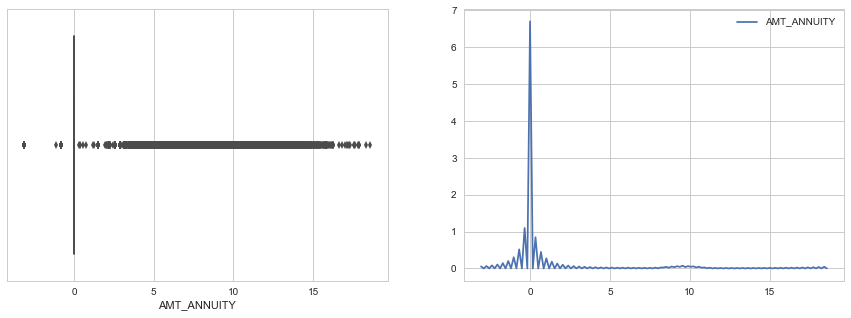

In [15]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(bureau.AMT_ANNUITY.map(lambda x: np.log(x) if x>0 else 0),ax=axes[0])
sns.kdeplot(bureau.AMT_ANNUITY.map(lambda x: np.log(x) if x>0 else 0),ax=axes[1])

In [35]:
bureau_AMT_ANNUITY_Agg = bureau.groupby(by='SK_ID_CURR',axis=0,as_index=False).agg({"AMT_ANNUITY":['mean','std']})
d = bureau_AMT_ANNUITY_Agg.reset_index()

In [46]:
d.head()

index SK_ID_CURR  AMT_ANNUITY             
                           mean          std
0     0     100001  3545.357143  4800.607529
1     1     100002     0.000000     0.000000
2     2     100003          NaN          NaN
3     3     100004          NaN          NaN
4     4     100005  1420.500000  2460.378172

In [51]:
d['AMT_ANNUITY']['mean'].fillna(0.0).head()

0    3545.357143
1       0.000000
2       0.000000
3       0.000000
4    1420.500000
Name: mean, dtype: float64

In [52]:
d['SK_ID_CURR'].head()

0    100001
1    100002
2    100003
3    100004
4    100005
Name: SK_ID_CURR, dtype: int64

### Data Preperation for modeling ###

In [76]:
x = application.drop(list(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE','TARGET']),axis=1)

All = pd.concat([object_,x,application[['FLAG_OWN_CAR','FLAG_OWN_REALTY']],poly_features],axis=1)
X = All.loc[:trainLen-1]

Using XGBosst feature importance for finding the important features form the application data
### Model Building

In [77]:
X.head()

,CODE_GENDER,EMERGENCYSTATE_MODE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,OCCUPATION_TYPE,ORGANIZATION_TYPE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_PHONE,FLAG_WORK_PHONE,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,HOUR_APPR_PROCESS_START,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,FLAG_LUXURY,FLAG_DOCUMENTS,FLAG_ADDRESS,ChildCount,ANNUITY/CREDIT,EX_SC,FLAG_OWN_CAR,FLAG_OWN_REALTY,EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_1^2 DAYS_BIRTH,EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH,DAYS_BIRTH OWN_CAR_AGE^2,NormalizedEXT_SOURCE_2 DAYS_EMPLOYED^2
0,1,0.0,0.0,0.0,0,1,0,1,1,0.0,1.0,5,1.0,3,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0247,0.0250,0.0252,0.0369,0.0369,0.0383,0,1.0,0.0143,0.0144,0.0144,-9461,-637,-2120,-1134.0,-3648.0,2.0,2.0,0.00,0.00,0.0000,0.0690,0.0690,0.0690,0.083037,0.262949,0.139376,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0.0833,0.0833,0.0833,0.1250,0.1250,0.1250,10,0.0369,0.0375,0.0377,0,0,0.0202,0.0205,0.022,0.0190,0.0193,0.0198,0.0000,0.0000,0.0,0.0000,0.00,0.0,2.0,2.0,NaN,0.018801,2,2,0,0,0,0,100002,0.0149,0.9722,0.9722,0.9722,0.6192,0.6243,0.6341,5,1,0,0,-2.801000,0.095463,0,1,0.003043,0.005108,-65.234900,-109.495390,-766341.0,-0.433939
1,0,0.0,0.0,0.0,0,2,1,1,4,1.0,3.0,39,2.0,1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0959,0.0968,0.0924,0.0529,0.0529,0.0538,0,2.0,0.0605,0.0608,0.0497,-16765,-1188,-291,-828.0,-1186.0,0.0,0.0,0.08,0.08,0.0806,0.0345,0.0345,0.0345,0.311267,0.622246,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0.2917,0.2917,0.2917,0.3333,0.3333,0.3333,11,0.0130,0.0132,0.0128,0,0,0.0773,0.0787,0.079,0.0549,0.0558,0.0554,0.0039,0.0039,0.0,0.0098,0.01,0.0,1.0,1.0,NaN,0.003541,1,1,0,0,0,0,100003,0.0714,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040,4,1,0,0,-3.590000,NaN,0,0,0.103327,0.177093,-1624.316241,-2783.918658,-1357965.0,-0.433911
2,1,NaN,NaN,NaN,1,1,0,1,1,0.0,1.0,11,NaN,1,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,NaN,NaN,NaN,-19046,-225,-2531,-815.0,-4260.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.555912,0.729567,1,0,0

In [78]:
Y = application.loc[:trainLen-1].TARGET.dropna()

In [79]:
from xgboost import XGBClassifier,plot_importance

In [80]:
xgb = XGBClassifier()
xgb.fit(X,Y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

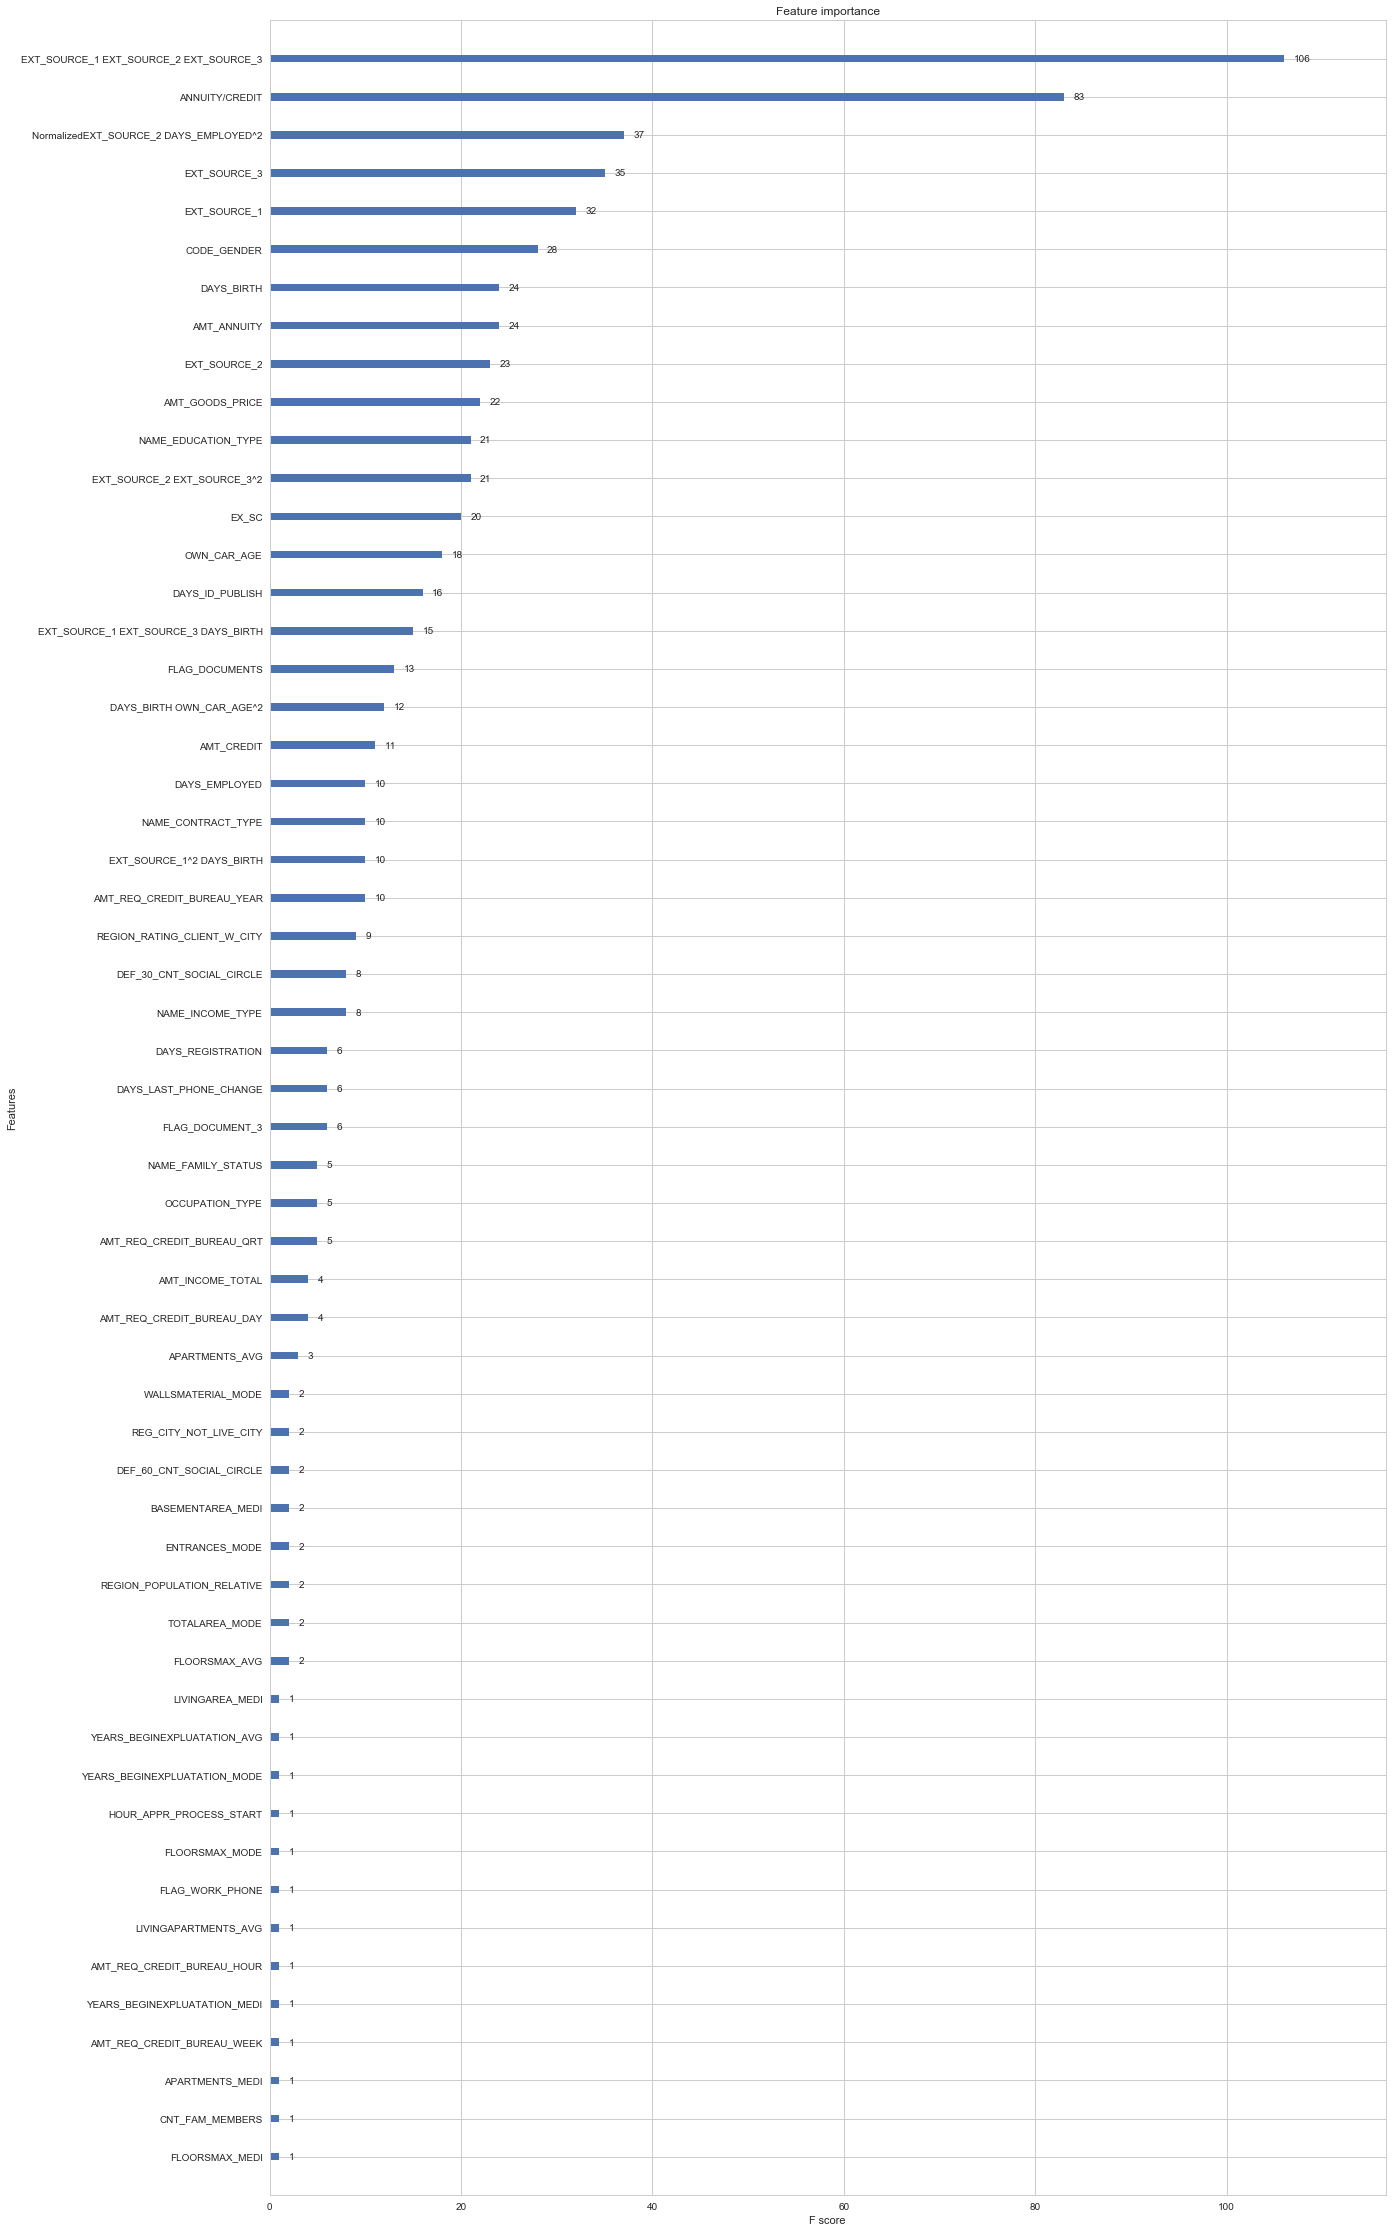

In [81]:
fig, ax = plt.subplots(figsize=(20, 40))
plot_importance(xgb, ax=ax)


In [82]:
sorted_idx = np.argsort(xgb.feature_importances_)[::-1]
l = []
for index in sorted_idx:
    #print([X.columns[index], xgb.feature_importances_[index]]) 
    if xgb.feature_importances_[index] > 0.0:
        l.append(X.columns[index])

In [105]:
l[:20]

['EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'ANNUITY/CREDIT',
 'NormalizedEXT_SOURCE_2 DAYS_EMPLOYED^2',
 'EXT_SOURCE_3',
 'EXT_SOURCE_1',
 'CODE_GENDER',
 'DAYS_BIRTH',
 'AMT_ANNUITY',
 'EXT_SOURCE_2',
 'AMT_GOODS_PRICE',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'NAME_EDUCATION_TYPE',
 'EX_SC',
 'OWN_CAR_AGE',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'FLAG_DOCUMENTS',
 'DAYS_BIRTH OWN_CAR_AGE^2',
 'AMT_CREDIT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

For Baseline Score just using Application DataFrame Lets run XGBoost

In [84]:
### Import algorithmns ######
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
#import xgboost 
#from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedKFold,learning_curve
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV 

C:\Users\sutiwari\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\sutiwari\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Keeping all the fraud records and taking samples from Legit

In [102]:
Z.TARGET.value_counts()[1]/Z.TARGET.value_counts()[0]

0.088381029426635657

In [101]:
application.TARGET.value_counts()[1]/application.TARGET.value_counts()[0]

0.08781828601345662

Fraud rate is maintained in the sample

In [85]:
X = X.fillna(-999999)
Z= pd.concat([X,Y],axis=1).sample(frac=0.035,replace=True)
Z.shape

(10763, 134)

In [86]:
X_train,X_test,Y_train,Y_test = train_test_split(Z.loc[:,Z.columns.isin(l)],Z.TARGET,test_size=0.3)
print(X_train.shape , Y_train.shape)
print(X_test.shape , Y_test.shape)

(7534, 56) (7534,)
(3229, 56) (3229,)


#### Comparing 3 popular classifier and evaluate the mean accuracy of each of them by a stratified kfold cross validation procedure.

In [87]:
kfold = StratifiedKFold(n_splits=5)

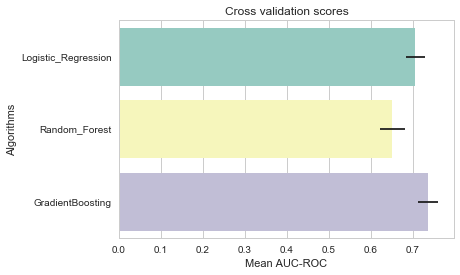

In [88]:
## Testing Different Algorithms ##
random_Seed = 2
classifiers = []
classifiers.append(LogisticRegression(random_state=random_Seed))
classifiers.append(RandomForestClassifier(random_state=random_Seed))
classifiers.append(GradientBoostingClassifier(random_state=random_Seed))

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,X_train,y=Y_train,scoring="roc_auc",cv=kfold,n_jobs=4))

cv_means = []
cv_std = [] 

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"Cross_Validation_Mean":cv_means,"Cross_Validation_Error":cv_std,"Algorithms":["Logistic_Regression","Random_Forest","GradientBoosting"]})
g = sns.barplot("Cross_Validation_Mean","Algorithms",data=cv_res,palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean AUC-ROC")
g = g.set_title("Cross validation scores")

In [89]:
cv_result.mean()

0.73583308491678456

#### Hyper Parameter Tunning ####

Random Forest


In [90]:
### Random Forest Tunning ###
RFC = RandomForestClassifier()
## Searching Grid for optimal parameter ##
rf_param_grid = {
    "max_depth":[5,7,10],
    "max_features":[1,3,8],
    "min_samples_split":[2,3,10],
    "min_samples_leaf":[1,3,10],
    "bootstrap":[False],
    "n_estimators":[100,300],
    "criterion":["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=4, scoring="roc_auc", n_jobs= 4, verbose =True )
gsRFC.fit(X_train,Y_train)
RFC_best = gsRFC.best_estimator_
gsRFC.best_score_

Fitting 4 folds for each of 162 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   25.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  5.7min
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:  9.4min finished


0.7480990205480427

In [91]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=5, scoring="roc_auc", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   36.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:  4.9min finished


0.7536817317497614

In [92]:
#### Logistic Regression ####
logistic = LogisticRegression()
# penalty = ['l1','l2']
# C = np.logspace(0,4,10)
hyperparameters = {"C":[0.001,0.01,0.1,1,10,100],"penalty":['l1','l2']}
clf = GridSearchCV(logistic,param_grid=hyperparameters,scoring="roc_auc",cv=5,n_jobs = 4,verbose=1)
clf.fit(X_train,Y_train)

# View best hyperparameters
print('Best Penalty:', clf.best_estimator_.get_params()['penalty'])
print('Best C:', clf.best_estimator_.get_params()['C'])
print('Best Score :',clf.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   35.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:   46.5s finished


Best Penalty: l1
Best C: 100
Best Score : 0.7452419754253874


#### Ploting learning Curve ####

In [93]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv,scoring="roc_auc" ,n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

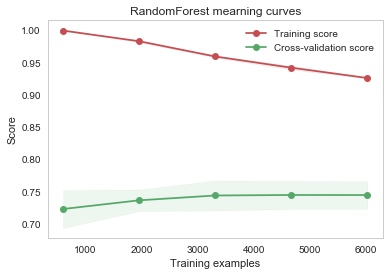

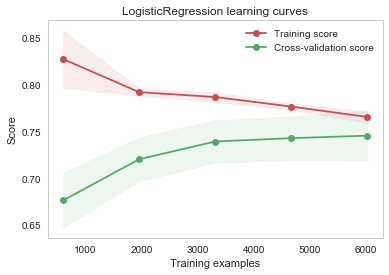

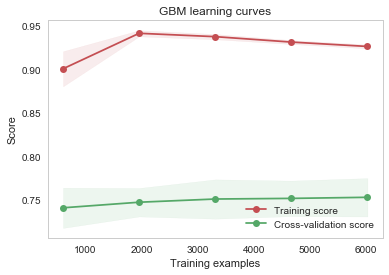

In [94]:
g = plot_learning_curve(gsRFC.best_estimator_,"RandomForest mearning curves",X_train,Y_train,cv=5)
g = plot_learning_curve(clf.best_estimator_,"LogisticRegression learning curves",X_train,Y_train,cv=5)
g = plot_learning_curve(gsGBC.best_estimator_,"GBM learning curves",X_train,Y_train,cv=5)

### Model Evaluation ###

###  Model Submission ###

In [98]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('log', clf.best_estimator_),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X.loc[:,X.columns.isin(l)], Y)

#### Label Encoding Test Data ##

In [113]:
from sklearn import preprocessing
def label_encoding(test):
    for col in test.columns:
        if test[col].dtype == "object":
            le = preprocessing.LabelEncoder()
            #le.fit(test[col].astype(str))
            test[col] = le.fit_transform(test[col].astype(str))
    return test


Fitting the ensemble model on the test

In [ ]:
test_ = All.loc[trainLen:,All.columns.isin(l)]
test_ = test_.fillna(np.nan)
test_ = test_.fillna(-999999)
label_encoding(test)
predicted = votingC.predict_proba(test_)[:,1]
results = pd.DataFrame({"SK_ID_CURR":test["SK_ID_CURR"],"TARGET":predicted})
results.to_csv("C:/Users/sutiwari/Downloads/kaggle_home_credit_risk/ensemble_Home_Credit_Loan_voting_Submission_V1.csv",index=False)